## Chapter 2. Accessing Text Corpora and Lexical Resources 

큰 사이즈의 언어 데이터 = corpora 라고 한다. <br>
학습목표 1. 유용한 텍스트 corpora 리소스를 찾고 접근해보기 <br>
학습목표 2. 어떤 Python construct가 유용한지 알아보기 <br> 
학습목표 3. 코드를 짤 때 스스로 반복하지 않는 방법 알아보기 <br>

### 2.1 Accessing Text Corpora

In [2]:
nltk.download() # download "book"

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Gutenberg Corpus (www.gutenberg.org)

In [6]:
# Method 1
import nltk
nltk.corpus.gutenberg.fileids() # this is file identifiers
# Method 2
from nltk.corpus import gutenberg 
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
# Jane Austen's Emma
emma = nltk.corpus.gutenberg.words("austen-emma.txt") # method 1
emma = gutenberg.words("austen-emma.txt") # method 2
len(emma)

192427

In [8]:
# Display information about texts in Gutenberg 
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid)) # letters, including spaces 
    num_words = len(gutenberg.words(fileid)) # words 
    num_sents = len(gutenberg.sents(fileid)) # sentences 
    num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)])) # unique vocabulary
    # print "average word length, average sentence length, number of appearances
    print(int(num_chars/num_words), int(num_words/num_sents), int(num_words/num_vocab), fileid) 

4 24 26 austen-emma.txt
4 26 16 austen-persuasion.txt
4 28 22 austen-sense.txt
4 33 79 bible-kjv.txt
4 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 17 12 burgess-busterbrown.txt
4 20 12 carroll-alice.txt
4 20 11 chesterton-ball.txt
4 22 11 chesterton-brown.txt
4 18 10 chesterton-thursday.txt
4 20 24 edgeworth-parents.txt
4 25 15 melville-moby_dick.txt
4 52 10 milton-paradise.txt
4 11 8 shakespeare-caesar.txt
4 12 7 shakespeare-hamlet.txt
4 12 6 shakespeare-macbeth.txt
4 36 12 whitman-leaves.txt


### Web and Chat Text 

In [9]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [10]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts("10-19-20s_706posts.xml")
chatroom[123]

['i',
 'do',
 "n't",
 'want',
 'hot',
 'pics',
 'of',
 'a',
 'female',
 ',',
 'I',
 'can',
 'look',
 'in',
 'a',
 'mirror',
 '.']

### Brown Corpus: 첫번째 백만-워드 코퍼스 (1961) (icame.uib.no/brown/bcm-los.html)

In [17]:
from nltk.corpus import brown
brown.categories() # shows categories of texts in Brown

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

Brown 코퍼스의 경우, 장르별로 다른 스타일을 관찰할 수 있기 때문에 stylistics 연구를 하기에 좋다. 

In [18]:
brown.words(categories="news") # show words in news category

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [19]:
brown.words(fileids=['cg22']) # show words in "cg22" fileid

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [20]:
brown.sents(categories=["news", "editorial", "reviews"])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [21]:
# 각 장르의 조동사 변화를 알아보자
news_text = brown.words(categories="news") # 먼저 뉴스 장르 안에서 조동사 frequency 찾기

In [22]:
fdist = nltk.FreqDist([w.lower() for w in news_text])

In [24]:
modals = ["can", "could", "may", "might", "must", "will"]

In [28]:
for m in modals:
    print(str(m) + ":" + str(fdist[m]))

can:94
could:87
may:93
might:38
must:53
will:389


In [30]:
# Conditional Frequency Distributions
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))

In [31]:
genres = ["news", "religion", "hobbies", "science-fiction", "romance", "humor"]

In [32]:
modals = ["can", "could", "may", "might", "must", "will"]

In [33]:
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science-fiction     0     0     0     0     0     0 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


### Reuters Corpus (10,788 news documents, 1.3 million words, 90 topics, "training" and "test")

In [34]:
from nltk.corpus import reuters 
reuters.fileids()

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [35]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [36]:
reuters.categories("training/9865")

['barley', 'corn', 'grain', 'wheat']

In [38]:
reuters.categories(["training/9865", "training/9880"])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [39]:
reuters.fileids("barley")

['test/15618',
 'test/15649',
 'test/15676',
 'test/15728',
 'test/15871',
 'test/15875',
 'test/15952',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18263',
 'test/18908',
 'test/19275',
 'test/19668',
 'training/10175',
 'training/1067',
 'training/11208',
 'training/11316',
 'training/11885',
 'training/12428',
 'training/13099',
 'training/13744',
 'training/13795',
 'training/13852',
 'training/13856',
 'training/1652',
 'training/1970',
 'training/2044',
 'training/2171',
 'training/2172',
 'training/2191',
 'training/2217',
 'training/2232',
 'training/3132',
 'training/3324',
 'training/395',
 'training/4280',
 'training/4296',
 'training/5',
 'training/501',
 'training/5467',
 'training/5610',
 'training/5640',
 'training/6626',
 'training/7205',
 'training/7579',
 'training/8213',
 'training/8257',
 'training/8759',
 'training/9865',
 'training/9958']

In [41]:
reuters.fileids(["barley", "corn"])

['test/14832',
 'test/14858',
 'test/15033',
 'test/15043',
 'test/15106',
 'test/15287',
 'test/15341',
 'test/15618',
 'test/15648',
 'test/15649',
 'test/15676',
 'test/15686',
 'test/15720',
 'test/15728',
 'test/15845',
 'test/15856',
 'test/15860',
 'test/15863',
 'test/15871',
 'test/15875',
 'test/15877',
 'test/15890',
 'test/15904',
 'test/15906',
 'test/15910',
 'test/15911',
 'test/15917',
 'test/15952',
 'test/15999',
 'test/16012',
 'test/16071',
 'test/16099',
 'test/16147',
 'test/16525',
 'test/16624',
 'test/16751',
 'test/16765',
 'test/17503',
 'test/17509',
 'test/17722',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18035',
 'test/18263',
 'test/18482',
 'test/18614',
 'test/18908',
 'test/18954',
 'test/18973',
 'test/19165',
 'test/19275',
 'test/19668',
 'test/19721',
 'test/19821',
 'test/20018',
 'test/20366',
 'test/20637',
 'test/20645',
 'test/20649',
 'test/20723',
 'test/20763',
 'test/21091',
 'test/21243',
 'test/21493',
 'training/10120',
 'trai

In [42]:
reuters.words("training/9865")[:14] # title is in UPPERCASE

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export']

In [43]:
reuters.words(["training/9865", "training/9880"])

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [44]:
reuters.words(categories="barley")

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [45]:
reuters.words(categories=["barley", "corn"])

['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', ...]

### Inaugural Address Corpus (w/ time dimension)

In [46]:
from nltk.corpus import inaugural

In [48]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [49]:
[fileid[:4] for fileid in inaugural.fileids()]

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009']

In [51]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))

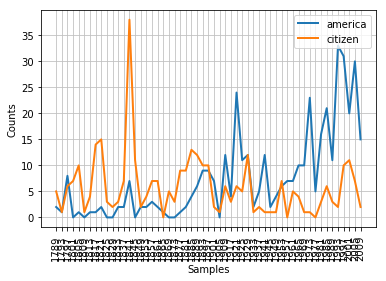

In [52]:
cfd.plot()

### Annotated Text Corpora (www.nltk.org/howto)

### Corpora in Other Languages 

### Text Corpus Structure

(1) Isolated: 구조 없이 그냥 단어가 나열되어 있는 텍스트 <br>
(2) Categorized: 장르와 토픽으로 구별되어 있는 텍스트 <br>
(3) Overlapping: 토픽 등이 겹치게 되어 있는 텍스트 <br>
(4) Temporal: 시간 순으로 언어를 나타내는 텍스트 

### Loading Your Own Corpus

In [ ]:
from nltk.corpus import PlaintextCorpusReader
corpus_root ="..." # 파일 경로 지정
wordlists = PlaintextCorpusReader(corpus_root, ".*") # 파일명
wordlists.fileids()

## 2.2 Conditional Frequency Distributions

NLTK's ConditionalFreqDist: 어떠한 "조건" (condition)에 따라 빈도의 분포를 리턴 <br>
FreqDist() = 리스트를 인풋으로 받아 빈도 계산 <br>
ConditionalFreqDist = (condition, event) 페어를 인풋으로 받음  

### Counting Words by Genre

In [54]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))

In [55]:
genre_word = [(genre, word) #3
             for genre in ['news', 'romance'] #1 
             for word in brown.words(categories=genre)] #2

In [56]:
len(genre_word)

170576

In [57]:
genre_word[:4]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [58]:
genre_word[-4:]

[('romance', 'afraid'),
 ('romance', 'not'),
 ('romance', "''"),
 ('romance', '.')]

In [59]:
cfd = nltk.ConditionalFreqDist(genre_word)

In [60]:
cfd

ConditionalFreqDist(nltk.probability.FreqDist,
                    {'news': FreqDist({'The': 806,
                               'Fulton': 14,
                               'County': 35,
                               'Grand': 6,
                               'Jury': 2,
                               'said': 402,
                               'Friday': 41,
                               'an': 300,
                               'investigation': 9,
                               'of': 2849,
                               "Atlanta's": 4,
                               'recent': 20,
                               'primary': 17,
                               'election': 38,
                               'produced': 6,
                               '``': 732,
                               'no': 109,
                               'evidence': 17,
                               "''": 702,
                               'that': 802,
                               'any': 90,
            

In [61]:
cfd.conditions()

['news', 'romance']

In [62]:
cfd['news']

FreqDist({'The': 806,
          'Fulton': 14,
          'County': 35,
          'Grand': 6,
          'Jury': 2,
          'said': 402,
          'Friday': 41,
          'an': 300,
          'investigation': 9,
          'of': 2849,
          "Atlanta's": 4,
          'recent': 20,
          'primary': 17,
          'election': 38,
          'produced': 6,
          '``': 732,
          'no': 109,
          'evidence': 17,
          "''": 702,
          'that': 802,
          'any': 90,
          'irregularities': 3,
          'took': 47,
          'place': 25,
          '.': 4030,
          'jury': 44,
          'further': 16,
          'in': 1893,
          'term-end': 1,
          'presentments': 1,
          'the': 5580,
          'City': 44,
          'Executive': 6,
          'Committee': 37,
          ',': 5188,
          'which': 244,
          'had': 279,
          'over-all': 2,
          'charge': 17,
          'deserves': 3,
          'praise': 2,
          'and': 2146,
   

In [63]:
cfd['romance']

FreqDist({'They': 69,
          'neither': 7,
          'liked': 12,
          'nor': 5,
          'disliked': 4,
          'the': 2758,
          'Old': 17,
          'Man': 13,
          '.': 3736,
          'To': 15,
          'them': 142,
          'he': 702,
          'could': 193,
          'have': 258,
          'been': 179,
          'broken': 8,
          'bell': 4,
          'in': 875,
          'church': 29,
          'tower': 1,
          'which': 104,
          'rang': 6,
          'before': 88,
          'and': 1776,
          'after': 58,
          'Mass': 1,
          ',': 3899,
          'at': 402,
          'noon': 4,
          'six': 11,
          'each': 24,
          'evening': 14,
          '--': 291,
          'its': 69,
          'tone': 9,
          'repetitive': 1,
          'monotonous': 1,
          'never': 84,
          'breaking': 4,
          'boredom': 3,
          'of': 1186,
          'streets': 5,
          'The': 230,
          'was': 993,
         

### Plotting and Tabulating Distributions

In [64]:
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))

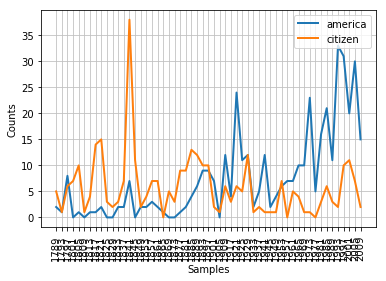

In [65]:
cfd.plot()

In [68]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch', 'Hungarian_Magyar', 'Ibibio_Efik']

In [69]:
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))

In [70]:
cfd.tabulate(conditions=["English", "German_Deutsch"], samples=range(10), cumulative=True)

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


### Generating Random Text with Bigrams

bigrams() = 워드 리스트를 인풋으로 받아서 순차적인 단어 쌍을 만듦

In [73]:
sent = ["In", "the", "beginning", "God", "created", "the", "heaven", "and", "the", "earth", "."]
nltk.bigrams(sent)

<generator object bigrams at 0x115ef7620>

In [75]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word), 
        word = cfdist[word].max()
text = nltk.corpus.genesis.words("english-kjv.txt")
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [76]:
print(cfd['living'])

<FreqDist with 6 samples and 16 outcomes>


In [77]:
generate_model(cfd, 'living')

living
creature
that
he
said
,
and
the
land
of
the
land
of
the
land


## 2.3 More Python: Reusing Code

### Modules 
(Tip!) 텍스트 프로세싱을 위해 함수를 만들다 보면 나중에 보고 다시 쓸 일이 생긴다. 그럴 땐 한 파일에 모아서 저장해두는게 편하다. 

In [79]:
# textproc.py
from textproc import plural
plural('wish')

ModuleNotFoundError: No module named 'textproc'

MODULE: 파일 하나에 있는 변수와 함수의 모음 <br>
PACKAGE: 관련된 여러 개의 모듈 (예: NLTK의 Brown Corpus를 처리하기 위한 함수들은 모듈, 모든 코퍼스를 다 처리하기 위한 모듈의 모음은 패키지) <br>
LIBRARY: 패키지들의 모음 (예: NLTK)

## 2.4 Lexical Resources 

LEXICON: 단어나 구들에 연관된 정보들의 집합 (예: POS, sense definitions) <br>
LEXICAL ENTRY: LEXICON을 구성하는 정보들 <br>
LEMMA: 루트가 되는 단어 

### Wordlist Corpora

In [80]:
# Wordlist Corpora is only a set of words 
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab.difference(english_vocab)
    return sorted(unusual)

In [81]:
unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))

['abbeyland',
 'abhorred',
 'abilities',
 'abounded',
 'abridgement',
 'abused',
 'abuses',
 'accents',
 'accepting',
 'accommodations',
 'accompanied',
 'accounted',
 'accounts',
 'accustomary',
 'aches',
 'acknowledging',
 'acknowledgment',
 'acknowledgments',
 'acquaintances',
 'acquiesced',
 'acquitted',
 'acquitting',
 'acted',
 'actions',
 'adapted',
 'adding',
 'additions',
 'addressed',
 'addresses',
 'addressing',
 'adhering',
 'adieus',
 'adjusting',
 'administering',
 'admirers',
 'admires',
 'admitting',
 'adorned',
 'advances',
 'advantages',
 'affairs',
 'affections',
 'affects',
 'affixed',
 'afflictions',
 'afforded',
 'affording',
 'ages',
 'agitated',
 'agonies',
 'ailments',
 'aimed',
 'alarms',
 'alienated',
 'alighted',
 'alleged',
 'allenham',
 'allowances',
 'allowed',
 'allowing',
 'alluded',
 'alterations',
 'altered',
 'altering',
 'amended',
 'amounted',
 'amusements',
 'ankles',
 'annamaria',
 'annexed',
 'announced',
 'announcing',
 'annuities',
 'annum',
 

In [82]:
unusual_words(nltk.corpus.nps_chat.words())

['aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'abortions',
 'abou',
 'abourted',
 'abs',
 'ack',
 'acros',
 'actualy',
 'adams',
 'adds',
 'adduser',
 'adjusts',
 'adoted',
 'adreniline',
 'ads',
 'adults',
 'afe',
 'affairs',
 'affari',
 'affects',
 'afk',
 'agaibn',
 'ages',
 'aggravated',
 'agurlwithbigguns',
 'ahah',
 'ahahah',
 'ahahh',
 'ahahha',
 'ahh',
 'ahhah',
 'ahhahahaha',
 'ahhh',
 'ahhhh',
 'ahhhhhh',
 'ahhhhhhhhhhhhhh',
 'aiiiiiiiiiiiiiiiiiiiiiiii',
 'aiken',
 'aime',
 'akdt',
 'akon',
 'akron',
 'akst',
 'aligator',
 'allergies',
 'allo',
 'allowed',
 'aloha',
 'alohaaa',
 'alohas',
 'alot',
 'alotta',
 'alternatives',
 'alterz',
 'alwys',
 'alzheimers',
 'amazingness',
 'americans',
 'anithing',
 'ans',
 'answering',
 'answers',
 'antidepressants',
 'anygirl',
 'anymore',
 'anythin',
 'anytime',
 'anyyyyyyyyyyyyyyyyy',
 'aok',
 'apoligize',
 'appearently',
 'appears',
 'applaudes',
 'appleton',
 'appologise',
 'appologize',
 'aqwesome',
 'arggghhh',
 'argh',
 'armtnpeat',
 'arres

In [83]:
# Stopwords 
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [84]:
# How much of a text is not included in stopwords?
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)

In [85]:
content_fraction(nltk.corpus.reuters.words())

0.735240435097661

In [86]:
# Names Corpus
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

In [87]:
male_names = names.words('male.txt')

In [88]:
female_names = names.words('female.txt')

In [89]:
[w for w in male_names if w in female_names]

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel',
 'Ashley',
 'Aubrey',
 'Augustine',
 'Austin',
 'Averil',
 'Barrie',
 'Barry',
 'Beau',
 'Bennie',
 'Benny',
 'Bernie',
 'Bert',
 'Bertie',
 'Bill',
 'Billie',
 'Billy',
 'Blair',
 'Blake',
 'Bo',
 'Bobbie',
 'Bobby',
 'Brandy',
 'Brett',
 'Britt',
 'Brook',
 'Brooke',
 'Brooks',
 'Bryn',
 'Cal',
 'Cam',
 'Cammy',
 'Carey',
 'Carlie',
 'Carlin',
 'Carmine',
 'Carroll',
 'Cary',
 'Caryl',
 'Casey',
 'Cass',
 'Cat',
 'Cecil',
 'Chad',
 'Chris',
 'Chrissy',
 'Christian',
 'Christie',
 'Christy',
 'Clair',
 'Claire',
 'Clare',
 'Claude',
 'Clem',
 'Clemmie',
 'Cody',
 'Connie',
 'Constantine',
 'Corey',
 'Corrie',
 'Cory',
 'Courtney',
 'Cris',
 'Daffy',
 'Dale',
 'Dallas',
 'Dana',
 'Dani',
 'Daniel',
 'Dannie',
 'Danny',
 'Darby',
 'Darcy',
 'Darryl',
 'Daryl',
 'Deane',
 'Del',
 'Dell',
 'Deme

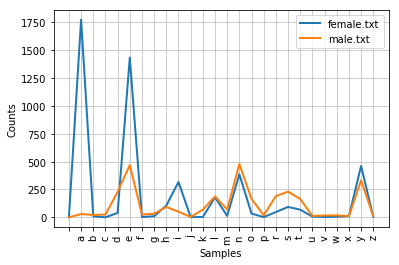

In [90]:
cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid))
cfd.plot()

### A Pronouncing Dictionary

In [92]:
# NLTK includes the CMU Pronouncing Dictionary for U.S. English
entries = nltk.corpus.cmudict.entries()

In [93]:
len(entries)

133737

In [96]:
for entry in entries[39943:39951]:
    print(entry)

('explorer', ['IH0', 'K', 'S', 'P', 'L', 'AO1', 'R', 'ER0'])
('explorers', ['IH0', 'K', 'S', 'P', 'L', 'AO1', 'R', 'ER0', 'Z'])
('explores', ['IH0', 'K', 'S', 'P', 'L', 'AO1', 'R', 'Z'])
('exploring', ['IH0', 'K', 'S', 'P', 'L', 'AO1', 'R', 'IH0', 'NG'])
('explosion', ['IH0', 'K', 'S', 'P', 'L', 'OW1', 'ZH', 'AH0', 'N'])
('explosions', ['IH0', 'K', 'S', 'P', 'L', 'OW1', 'ZH', 'AH0', 'N', 'Z'])
('explosive', ['IH0', 'K', 'S', 'P', 'L', 'OW1', 'S', 'IH0', 'V'])
('explosively', ['EH2', 'K', 'S', 'P', 'L', 'OW1', 'S', 'IH0', 'V', 'L', 'IY0'])


In [98]:
for word, pron in entries:
    if len(pron) == 3:
        ph1, ph2, ph3 = pron
        if ph1 == "P" and ph3 == "T":
            print(word, ph2,)

pait EY1
pat AE1
pate EY1
patt AE1
peart ER1
peat IY1
peet IY1
peete IY1
pert ER1
pet EH1
pete IY1
pett EH1
piet IY1
piette IY1
pit IH1
pitt IH1
pot AA1
pote OW1
pott AA1
pout AW1
puett UW1
purt ER1
put UH1
putt AH1


### Comparative Wordlists

### Shoebox and Toolbox Lexicons

TOOLBOX는 (옛 이름: SHOEBOX) 각 entry가 하나 또는 그 이상의 필드를 가지고 있는데, 각 필드는 반복되거나 null일 수 있다

## 2.5 WordNet

워드넷은 영어의 '의미 사전'이라고 할 수 있다. <br>
NLTK는 155,286개의 영어 단어와 117,659개의 유의어 세트로 이루어져 있다.

### Sense and Synonyms

a. Benz is credited with the invention of the <strong>motorcar</strong>. <br>
b. Benz is creited with the invention of the <strong>automobile</strong>.

In [2]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar') # the result is "synset" - a collection of synonymous words ("lemmas")

[Synset('car.n.01')]

In [7]:
wn.synset('car.n.01').lemma_names() 

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [8]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [9]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

In [10]:
wn.synset('car.n.01').lemmas() # shows all lemmas involving the given word 

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [11]:
wn.lemma('car.n.01.automobile')

Lemma('car.n.01.automobile')

In [13]:
wn.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

In [14]:
wn.lemma('car.n.01.automobile').name()

'automobile'

In [15]:
wn.synsets('car') # gives many synsets

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [16]:
for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


### The WordNet Hierarchy

상위 단어: unique beginners; root synsets (추상적 개념) <br>
하위 단어: 구체적인 의미를 가지는 단어들 <br>
개념이 주어졌을 때 (상위 단어 = hypernyms), 그것을 구성하는 구체적인 단어들의 예시 (하위 단어 = hyponyms)

In [17]:
motorcar = wn.synset('car.n.01')

In [18]:
types_of_motorcar = motorcar.hyponyms()

In [19]:
types_of_motorcar[26]

Synset('stanley_steamer.n.01')

In [31]:
sorted([lemma for synset in types_of_motorcar for lemma in synset.lemma_names()])

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

In [32]:
motorcar.hypernyms()

[Synset('motor_vehicle.n.01')]

In [33]:
paths = motorcar.hypernym_paths()

In [34]:
len(paths)

2

In [36]:
[synset.name() for synset in paths[0]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'container.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [37]:
[synset.name() for synset in paths[1]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'conveyance.n.03',
 'vehicle.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [38]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]

### More Lexical Relations

서로 유의어 세트인 hypernym과 hyponym을 lexical relations라고 부른다. <br>
meronym (부분어): 무언가를 구성하는 부분이나 성분이 되는 단어들 (예: 나무의 줄기, 뿌리, 가지 등) <br>
holonym: 무언가를 구성하여 이룰 수 있는 단어 (예: 나무가 모이면 숲) 

In [39]:
wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [40]:
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [41]:
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

In [42]:
for synset in wn.synsets('mint', wn.NOUN):
    print(synset.name() + ":", synset.definition())

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


In [43]:
wn.synset('mint.n.04').part_holonyms()

[Synset('mint.n.02')]

In [44]:
wn.synset('mint.n.04').substance_holonyms()

[Synset('mint.n.05')]

In [45]:
wn.synset('walk.v.01').entailments()

[Synset('step.v.01')]

In [46]:
wn.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

In [47]:
wn.synset('tease.v.03').entailments()

[Synset('arouse.v.07'), Synset('disappoint.v.01')]

In [49]:
wn.lemma('supply.n.02.supply').antonyms()

[Lemma('demand.n.02.demand')]

In [51]:
wn.lemma('rush.v.01.rush').antonyms()

[Lemma('linger.v.04.linger')]

In [52]:
wn.lemma('horizontal.a.01.horizontal').antonyms()

[Lemma('inclined.a.02.inclined'), Lemma('vertical.a.01.vertical')]

In [54]:
wn.lemma('staccato.r.01.staccato').antonyms()

[Lemma('legato.r.01.legato')]

In [55]:
dir(wn.synset('harmony.n.02'))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_hypernyms',
 '_definition',
 '_examples',
 '_frame_ids',
 '_hypernyms',
 '_instance_hypernyms',
 '_iter_hypernym_lists',
 '_lemma_names',
 '_lemma_pointers',
 '_lemmas',
 '_lexname',
 '_max_depth',
 '_min_depth',
 '_name',
 '_needs_root',
 '_offset',
 '_pointers',
 '_pos',
 '_related',
 '_shortest_hypernym_paths',
 '_wordnet_corpus_reader',
 'also_sees',
 'attributes',
 'causes',
 'closure',
 'common_hypernyms',
 'definition',
 'entailments',
 'examples',
 'frame_ids',
 'hypernym_distances',
 'hypernym_paths',
 'hypernyms',
 'hyponyms',
 'instance_hypernyms',
 'instance_hyponyms',
 'jcn

### Semantic Similarity

같은 상위 단어 (hypernym)을 공유하는 단어들은 서로 높은 상관관계를 가지고 있다고 할 수 있다. 

In [56]:
right = wn.synset('right_whale.n.01')

In [57]:
orca = wn.synset('orca.n.01')

In [58]:
minke = wn.synset('minke_whale.n.01')

In [59]:
tortoise = wn.synset('tortoise.n.01')

In [60]:
novel = wn.synset('novel.n.01')

In [61]:
right.lowest_common_hypernyms(minke)

[Synset('baleen_whale.n.01')]

In [62]:
right.lowest_common_hypernyms(orca)

[Synset('whale.n.02')]

In [63]:
right.lowest_common_hypernyms(tortoise)

[Synset('vertebrate.n.01')]

In [64]:
right.lowest_common_hypernyms(novel)

[Synset('entity.n.01')]

유의어 hierarchy의 depth를 알 수 있다.

In [65]:
wn.synset('baleen_whale.n.01').min_depth()

14

In [66]:
wn.synset('whale.n.02').min_depth()

13

In [67]:
wn.synset('vertebrate.n.01').min_depth()

8

In [68]:
wn.synset('entity.n.01').min_depth()

0

워드넷에서는 0-1사이의 숫자로 path_similarity 점수를 계산해 준다.

In [69]:
right.path_similarity(minke)

0.25

In [70]:
right.path_similarity(orca)

0.16666666666666666

In [71]:
right.path_similarity(tortoise)

0.07692307692307693

In [72]:
right.path_similarity(novel)

0.043478260869565216

## 2.6 Summary

<li>
텍스트 코퍼스라는 것은 크고 구조화된 텍스트의 집합이며, NLTK에는 많은 코퍼스들이 있다.
</li>
<li>
어떤 코퍼스는 '범주화'되어 있다. 즉 장르 또는 주제로, 그런데 이것들은 겹칠 수 있다.
</li>
<li>
Conditional Frequency Distribution이라는 것은 빈도 분포의 집합인데, 주어진 조건에 따라 빈도를 계산한 것이다. 
</li>
<li>
WordNet은 영어의 의미 사전이라고 생각하면 된다 - synonym set으로 이루어져 있으면서 네트워크 구조를 이루고 있다.
</li>